# Homework 1: Statistics with Python and SQL

### Setup

In [2]:
%load_ext sql

In [4]:
%sql sqlite:///sqlite-dvdrental.db

In [79]:
import sqlalchemy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
con = sqlalchemy.create_engine("sqlite:///sqlite-dvdrental.db")

### 1. Write a SQL query that gives for each customer the average rental duration and the number of rentals.
### 2.1. Load the data from your SQL query into a Python Pandas DataFrame.

In [104]:
df = pd.read_sql("""
SELECT
    customer_id
	, c.first_name || ' '|| c.last_name as full_name
	, CAST(AVG(JULIANDAY(r.return_date) - JULIANDAY(r.rental_date))*60 AS int) as avg_duration_in_hours
    , COUNT(rental_id) AS n_rentals
FROM rental r
LEFT JOIN customer c USING (customer_id)
GROUP BY 1, 2
ORDER BY 4 DESC
""", con)

In [105]:
df.dtypes

customer_id               int64
full_name                object
avg_duration_in_hours     int64
n_rentals                 int64
dtype: object

In [106]:
df.head(5)

,customer_id,full_name,avg_duration_in_hours,n_rentals
0,148,ELEANOR HUNT,317,46
1,526,KARL SEAL,352,45
2,144,CLARA SHAW,335,42
3,236,MARCIA DEAN,301,42
4,75,TAMMY SANDERS,299,41


### 2.2  Create a Seaborn regression plot, which is a scatterplot with a regression line.

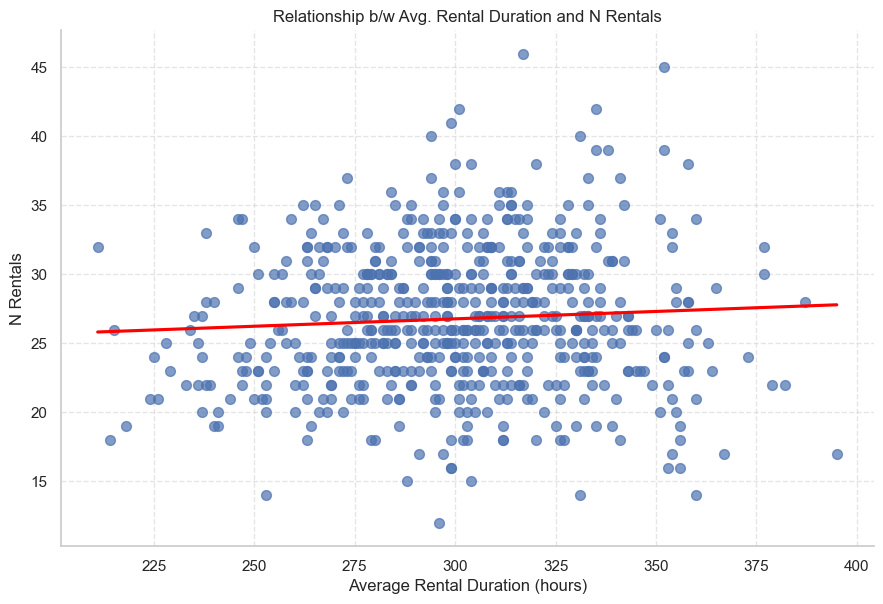

In [107]:
sns.set(style = "whitegrid")

sns.lmplot(x = "avg_duration_in_hours", y = "n_rentals", data = df, height=6, aspect=1.5, ci=None, scatter_kws={"s": 50, "alpha": 0.7}, line_kws={"color": "red"})

plt.xlabel("Average Rental Duration (hours)")
plt.ylabel("N Rentals")
plt.title("Relationship b/w Avg. Rental Duration and N Rentals")

plt.grid(axis='both', linestyle='--', alpha=0.5)
sns.despine()

plt.show()

### 3. Add in your Jupyter Notebook the mathematical formula for the arithmetic mean in a markdown cell.

Mathematical formula for arithmetic mean: $$\overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_{i}$$

### 4. Calculate the mean for the average rental duration and the number of rentals in Pandas.

In [108]:
mean_duration = df["avg_duration_in_hours"].mean(axis = 0)
mean_rentals = df["n_rentals"].mean(axis = 0)


### 5. Add to your Jupyter Notebook the mathematical formula for variance and standard deviation

Mathematical formula for Variance: 

$$S^{2} = \frac{\sum_{}^{} (x_{i} - \overline{x})^{2}}{n-1}$$ 
$$S^{2} = \text{sample variance}$$ 
$$x_{i} = \text{the value of one observation}$$ 
$$\overline{x} = \text{the mean value of all observations}$$ 
$$n = \text{the number of observations} $$

Mathematical formula for Standard Deviation:

$$ \sigma = \sqrt{\frac{{\sum{(x_{i} - \mu)}^{2}}}{N}} $$
$$\sigma = \text{population standard deviaton}$$
$$N = \text{the size of the population}$$
$$x_{i} = \text{each value from the population}$$
$$\mu = \text{the popluation mean}$$

### 6. Calculate the variance and standard deviations for the average rental duration and the number of rentals in Pandas.

In [109]:
variance_duration = df["avg_duration_in_hours"].var()
variance_rentals = df["n_rentals"].var()

In [110]:

std_duration = df["avg_duration_in_hours"].std()
std_rentals = df["n_rentals"].std()

### 7. Add to your Jupyter Notebook the mathematical formulas for covariance and correlation

Mathematical formula for Covariance: 

$$cov_{x,y} = \frac{\sum{(x_{i} - \overline{x})} (y_{i} - \overline{y})}{N-1}$$
$$cov_{x,y} = \text{covariance between variable x and y}$$
$$x_{i} = \text{data value of x}$$
$$y_{i} = \text{data value of y}$$
$$\overline{x} = \text{mean of x}$$
$$\overline{y} = \text{mean of y}$$
$$N = \text{number of data values}$$


Mathematical formula for Correlation:

$$ p(x, y) = \frac{cov(x, y)}{\sigma_{x} . \sigma_{y}}

### 8. Calculate in Pandas the covariance between the average rental duration and the number of rentals.

In [111]:
covariance_duration_rentals = df['n_rentals'].cov(df['avg_duration_in_hours'])

### 9. Calculate the Pearson's correlation coefficient in Pandas between average rental duration and number of rentals.

In [112]:
numeric_df = df[['n_rentals', 'avg_duration_in_hours']]
pearsoncorr = numeric_df.corr(method = 'pearson')

pearsoncorr


,n_rentals,avg_duration_in_hours
n_rentals,1.000000,0.066256
avg_duration_in_hours,0.066256,1.000000


### 10. Use Pingouin to calculate Pearson's correlation between average rental duration and number of rentals.

In [113]:
import pingouin as pg

pingouin_corr = pg.corr(df['n_rentals'], df['avg_duration_in_hours']).round(3)

pingouin_corr

,n,r,CI95%,p-val,BF10,power
pearson,599,0.066,"[-0.01, 0.15]",0.105,0.19,0.367


### 11. Add a markdown cell and describe the meaning of the p-value. What would you recommend to the CEO?

#### In simple terms, p-value is the risk of being wrong about rejecting the null hypothesis i.e. there is no clear correlation between avg. duration and the number of rentals. In this case, the p-value is 0.105 which is greater than the standard benchmark 0.05 needed to reject the null hypothesis. Hence, we do not have enough statistical evidence to back the CEO's claim. Therefore, I would not recommend to take actions based on this assumption.